In [66]:
#IMPORTING ALL THE LIBRARIES

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
# import os
# import pandas as pd


# output_directory = "D:\Prayag Files\Coding\Languages and related stuufs\Python\Ridhima Lung cancer detection"  # Replace "/path/to/your/directory" with the desired directory


# excel_file = "cancer patient data sets.xlsx"  # Replace "your_excel_file.xlsx" with the path to your Excel file
# df = pd.read_excel(excel_file)


# csv_file = os.path.join(output_directory, "output.csv")


# df.to_csv(csv_file, index=False)

# print("CSV file created successfully at:", csv_file)


In [68]:
#READING CSV FILE

df=pd.read_csv("output.csv")
df.head()

Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4                    2         2   
1  ...        1            3                    7         8   
2  ...        8            7                    9         2   
3  ...        4            2                    3         1   
4  ...        3            2                    4         1   

   Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  Dry Cough  \
0                      3                         1              2          3   
1                      6                         2              1          7   
2                      1                         4              6          7   
3                      4                         5              6          7   
4                      4                         2              4          2   

   Snoring   Level  
0        4     Low  
1        2  Medium  
2        2    High  
3        5    High  
4        3    High  

[5 rows x 25 columns]

In [69]:
df.shape
df.dtypes

Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [70]:
print(df.isnull().sum())
df = df.dropna()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [71]:

#MAPPING CSV FILE
import pandas as pd

df.columns = df.columns.str.strip()

mapping = {'high': 1, 'medium': 0, 'low': -1}


def map_with_handling(x):
    if pd.isna(x):  
        return 0  
    try:
        return mapping[x.lower()] 
    except KeyError:  
        return x  
    except ValueError:  
        return x  


df['Level'] = df['Level'].apply(map_with_handling)


print(df.head())


  Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4             

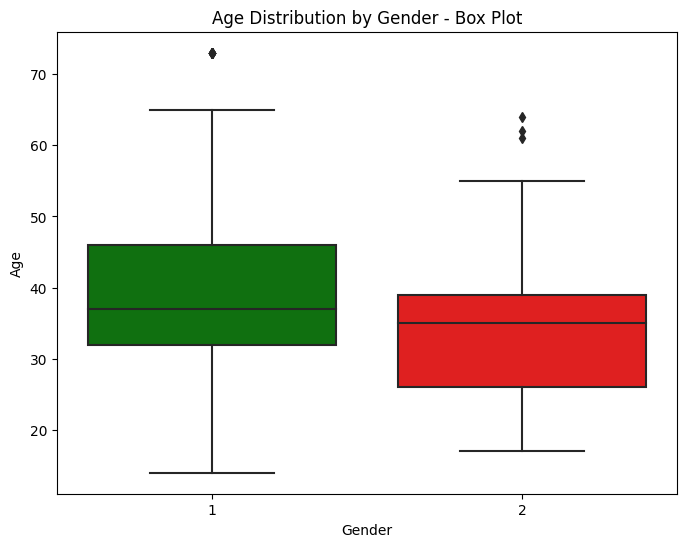

In [72]:
#DATA VISUALLIZATION

import seaborn as sns
import matplotlib.pyplot as plt

colors = ['green', 'red']

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df, palette=colors)
plt.title('Age Distribution by Gender - Box Plot')
plt.show()


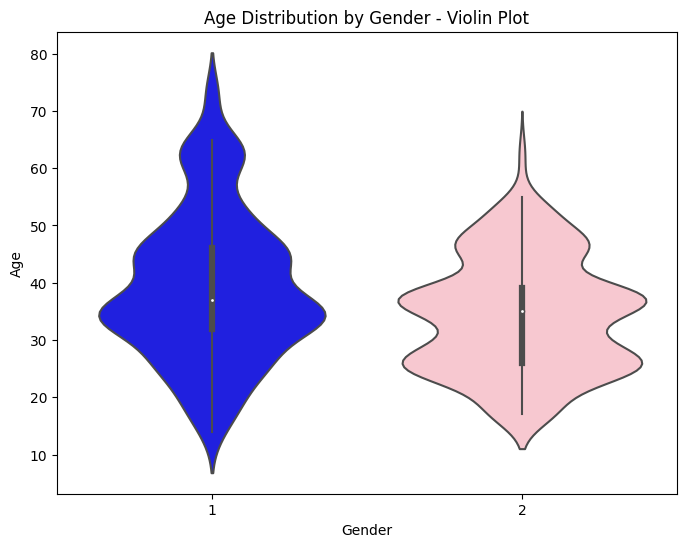

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt


colors = ['blue', 'pink']


plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Age', data=df, palette=colors)
plt.title('Age Distribution by Gender - Violin Plot')
plt.show()


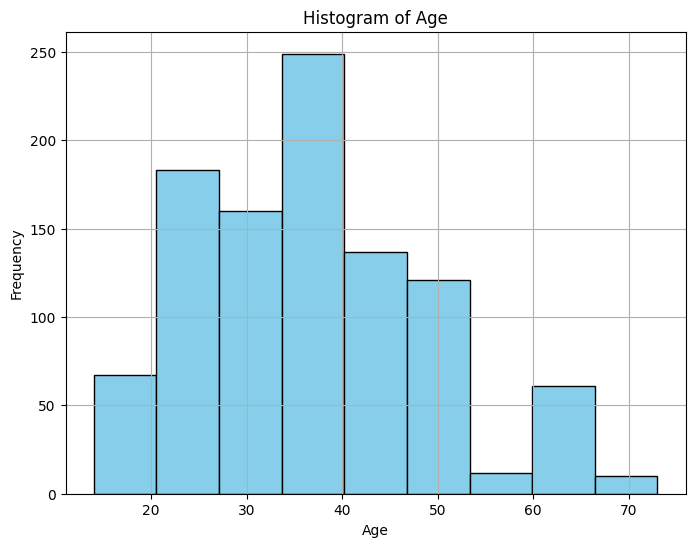

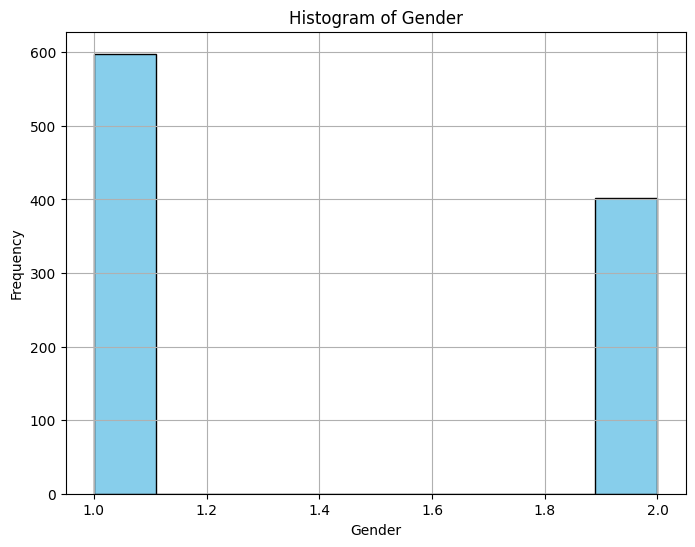

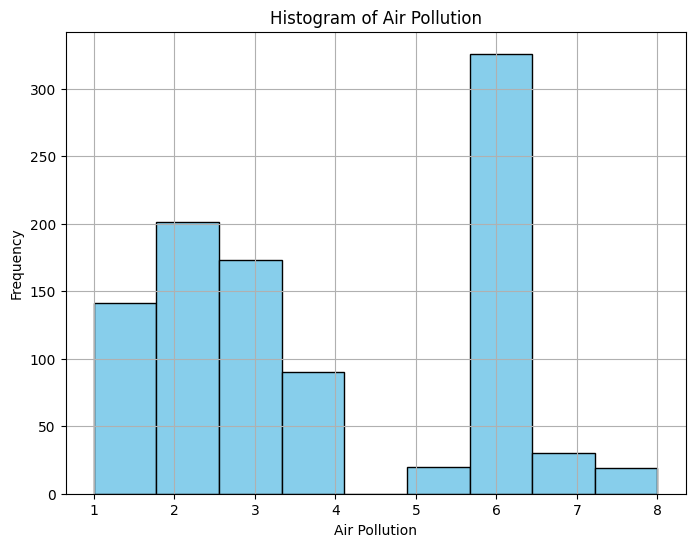

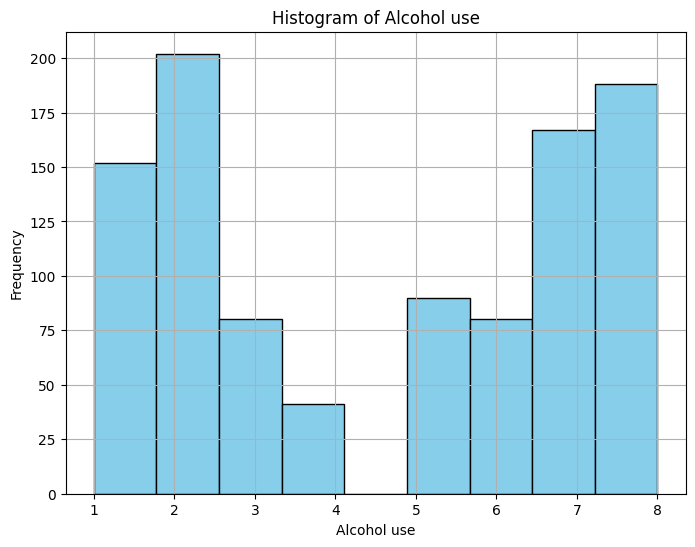

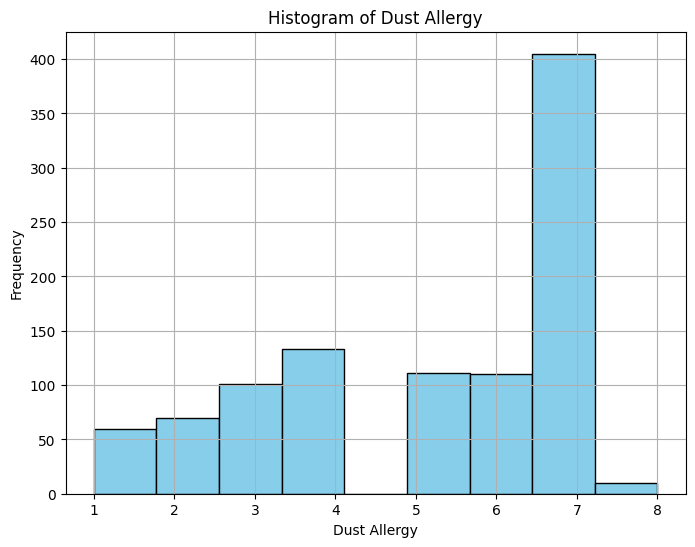

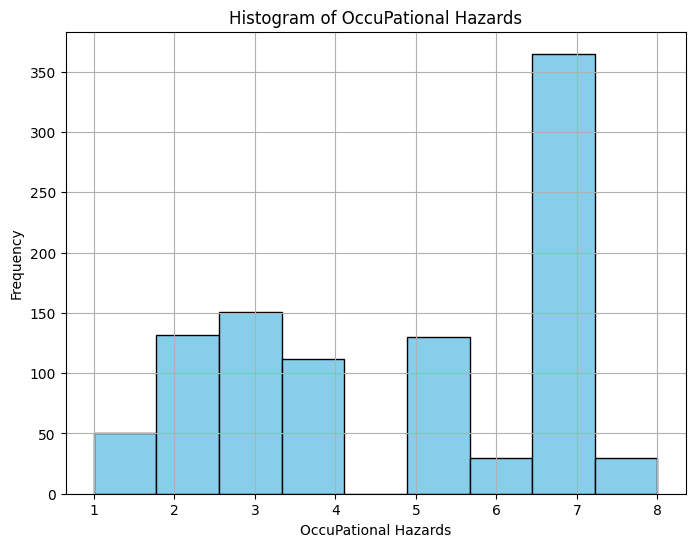

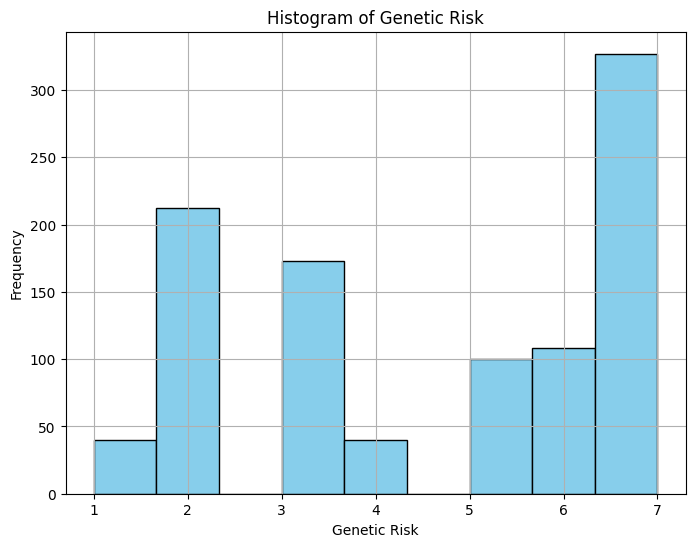

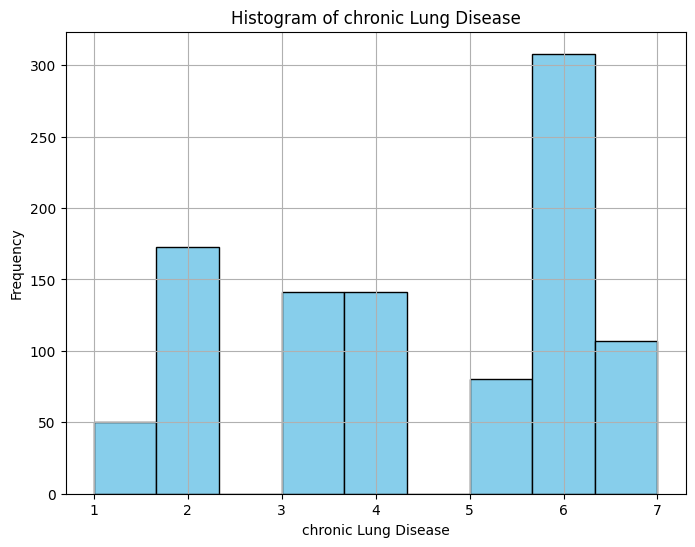

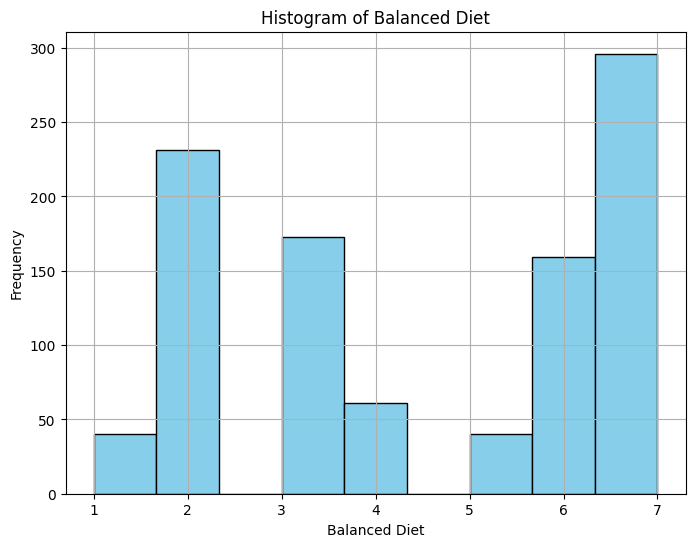

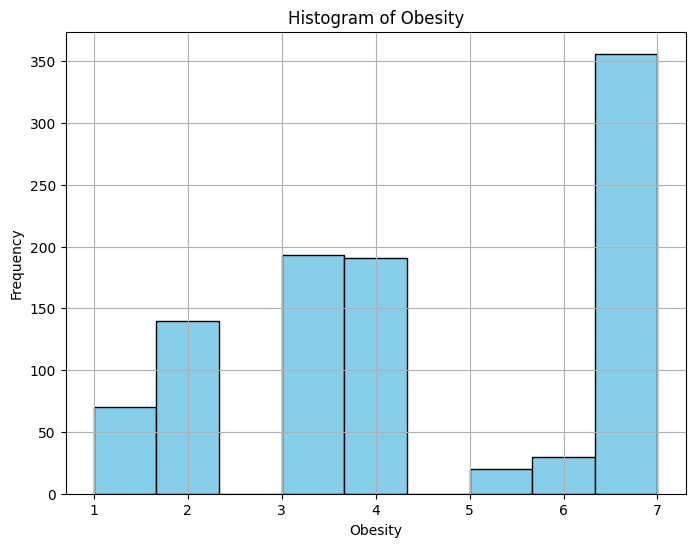

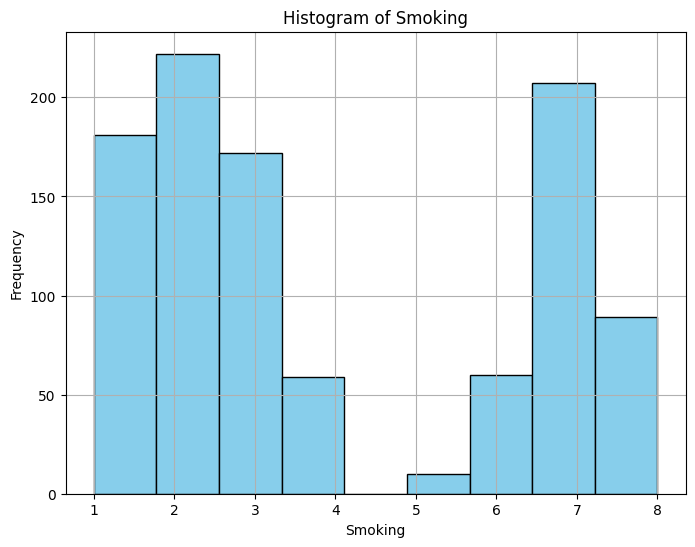

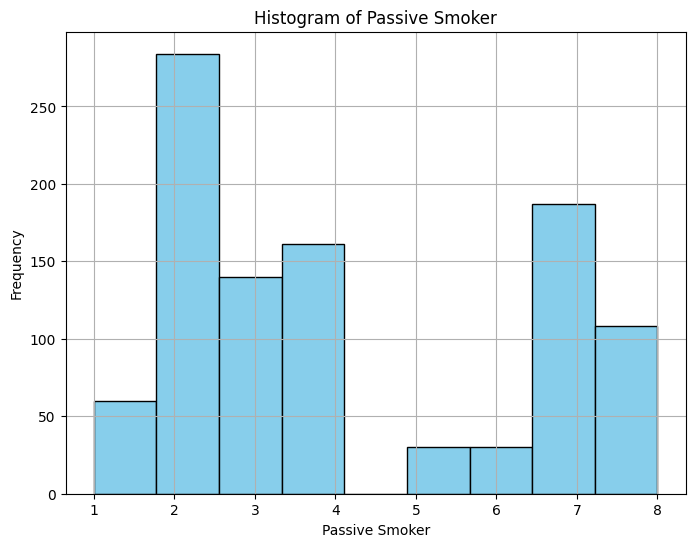

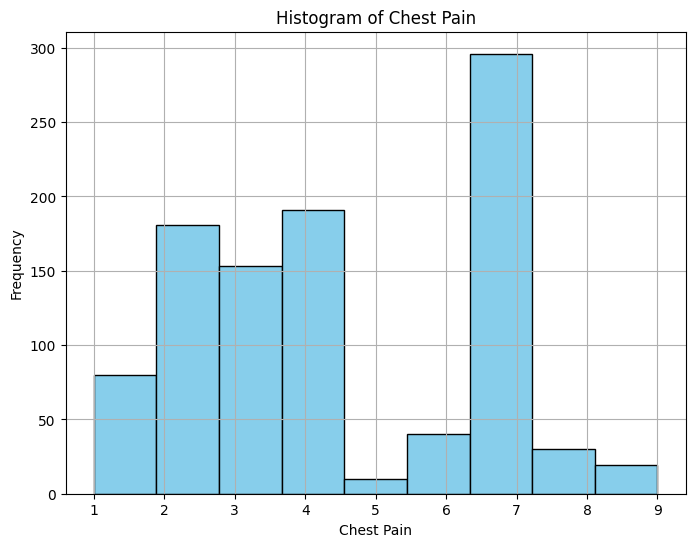

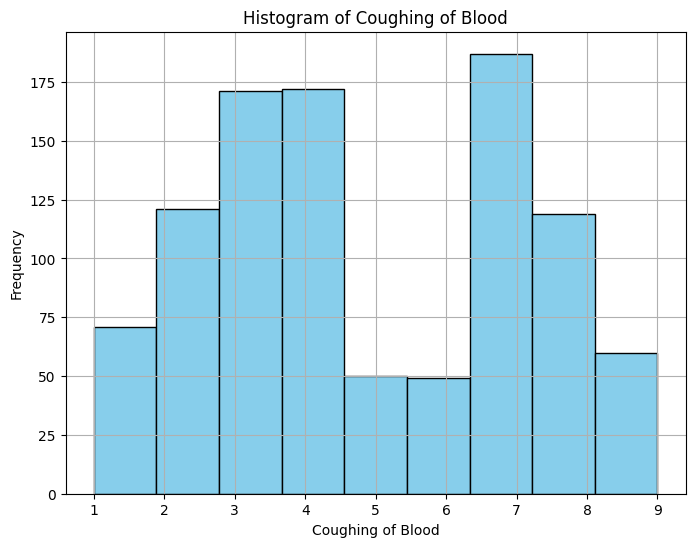

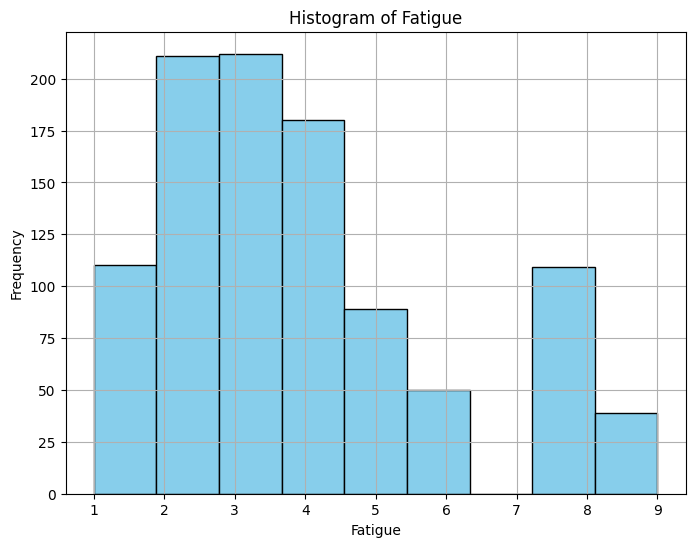

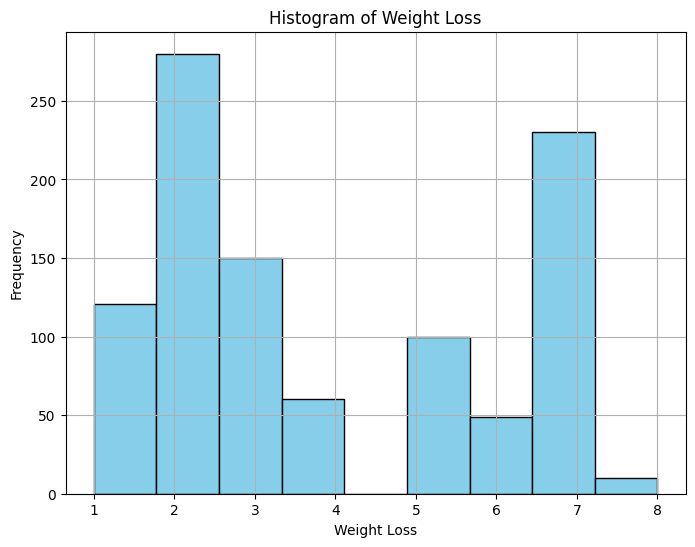

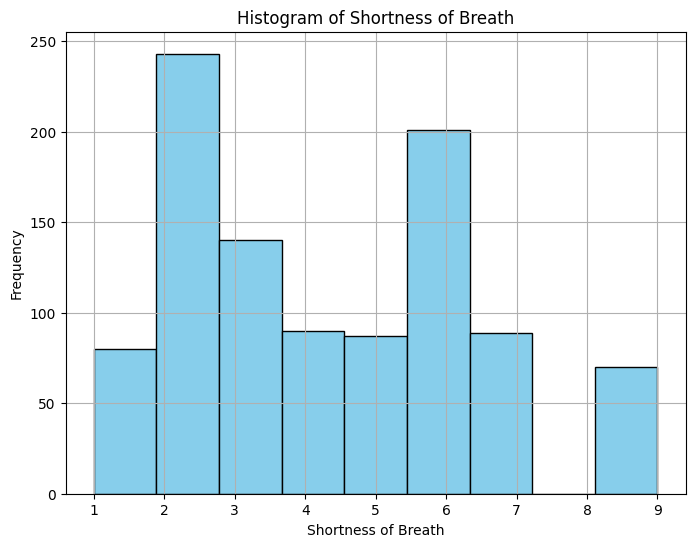

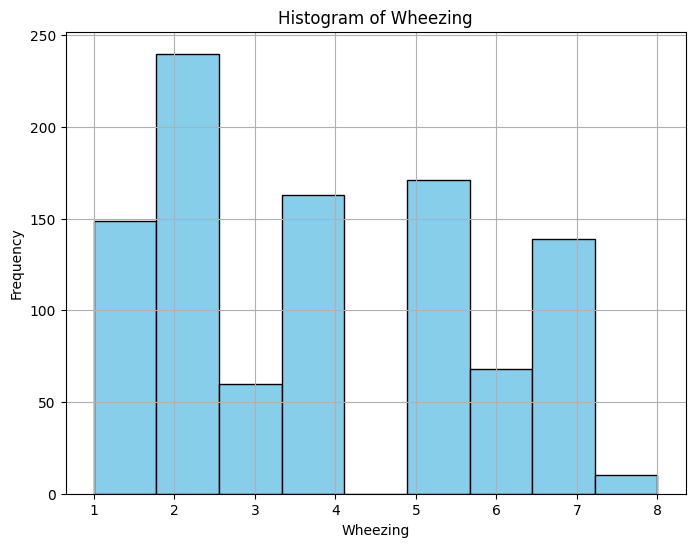

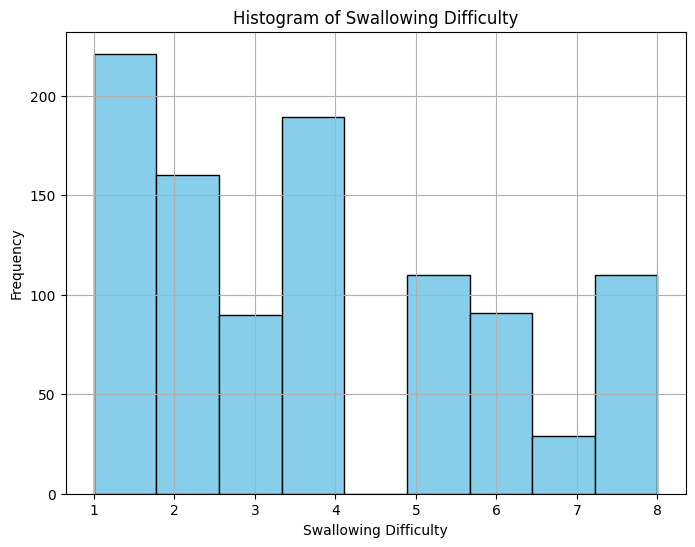

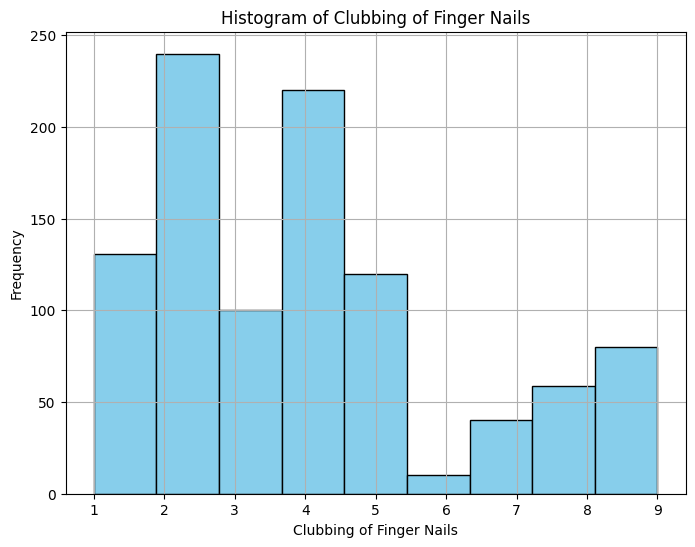

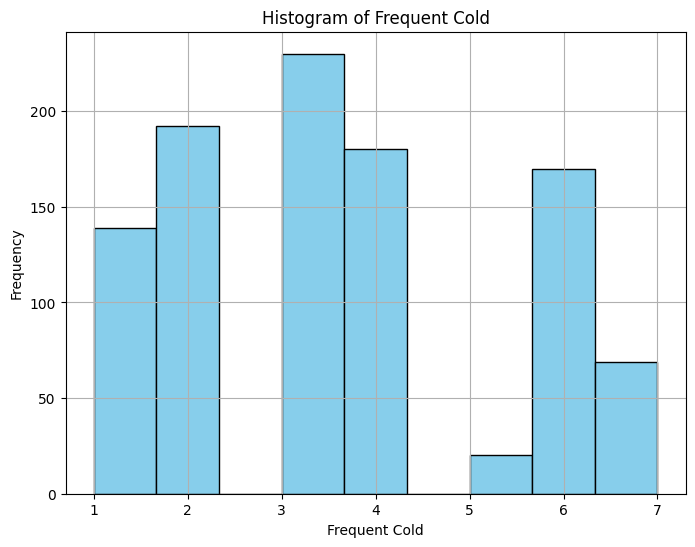

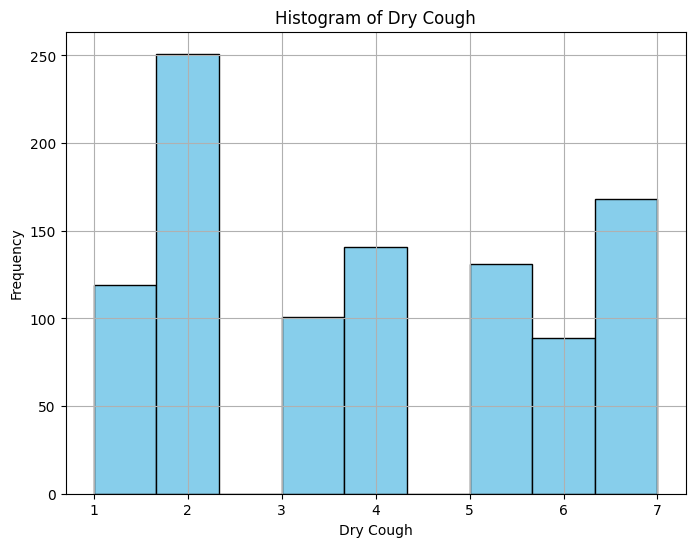

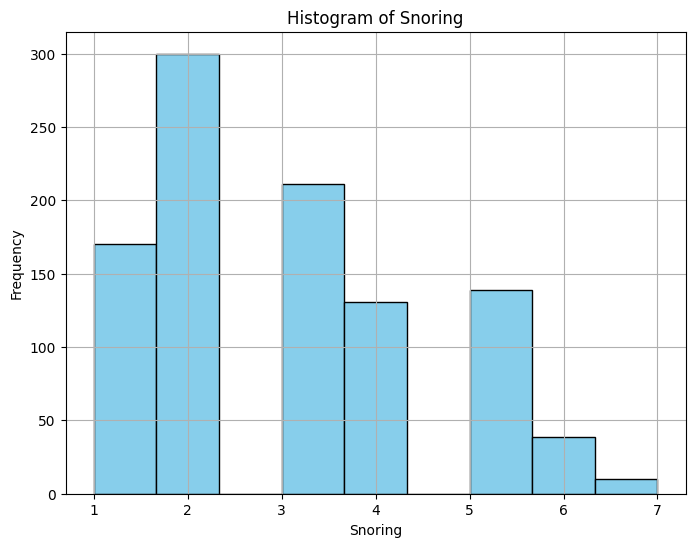

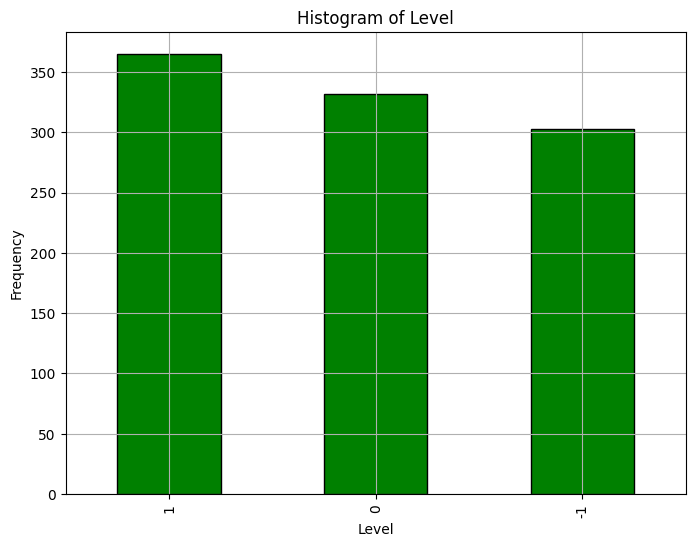

In [74]:
# # import pandas as pd
# # import matplotlib.pyplot as plt

# df = pd.read_csv('output.csv')

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns[:-1]

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=9, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


plt.figure(figsize=(8, 6))
df['Level'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Histogram of Level')
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Define the list of columns for plotting (ensure they exist in your DataFrame)
# new_columns = ['Patient Id', 'Age', 'Gender', 'Air Pollution',
#                'Alcohol Use', 'Dust Allergy', 'Genetic Risk',
#                'Chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
#                'Passive Smoker', 'Coughing of Blood', 'Fatigue', 'Weight Loss',
#                'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Frequent Cold',
#                'Snoring', 'Level']  # Include columns requiring mapping



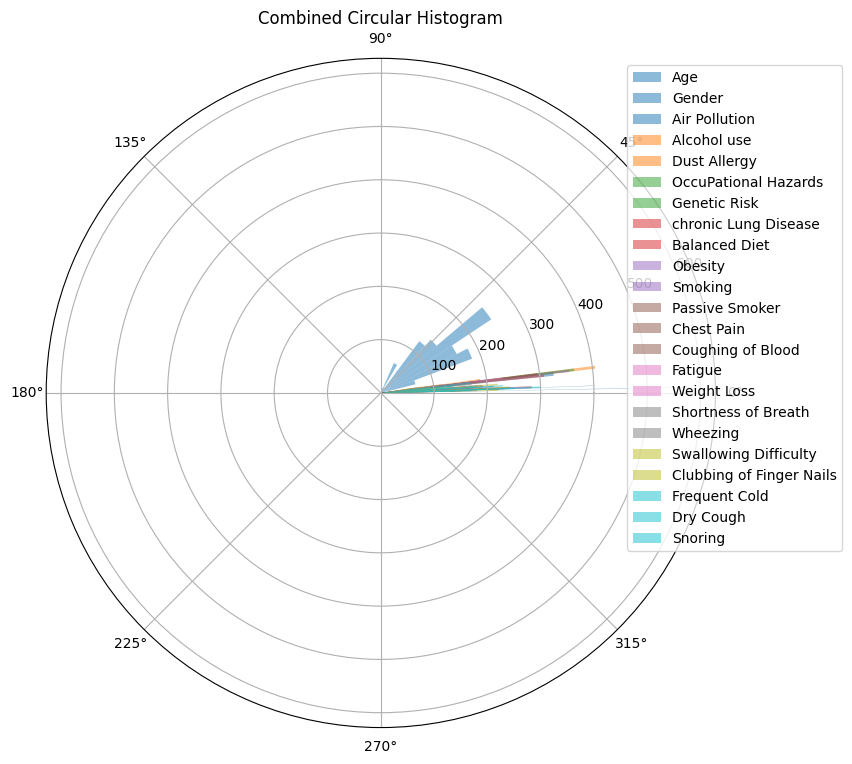

In [75]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# df = pd.read_csv('output.csv')


numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns[:-1]

colors = plt.cm.tab10(np.linspace(0, 1, len(numeric_columns)))


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)

for i, column in enumerate(numeric_columns):
 
    data = np.radians(df[column].values)

 
    ax.hist(data, bins=9, color=colors[i], alpha=0.5, label=column)

ax.set_title('Combined Circular Histogram')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout(pad=2.0)  
plt.show()


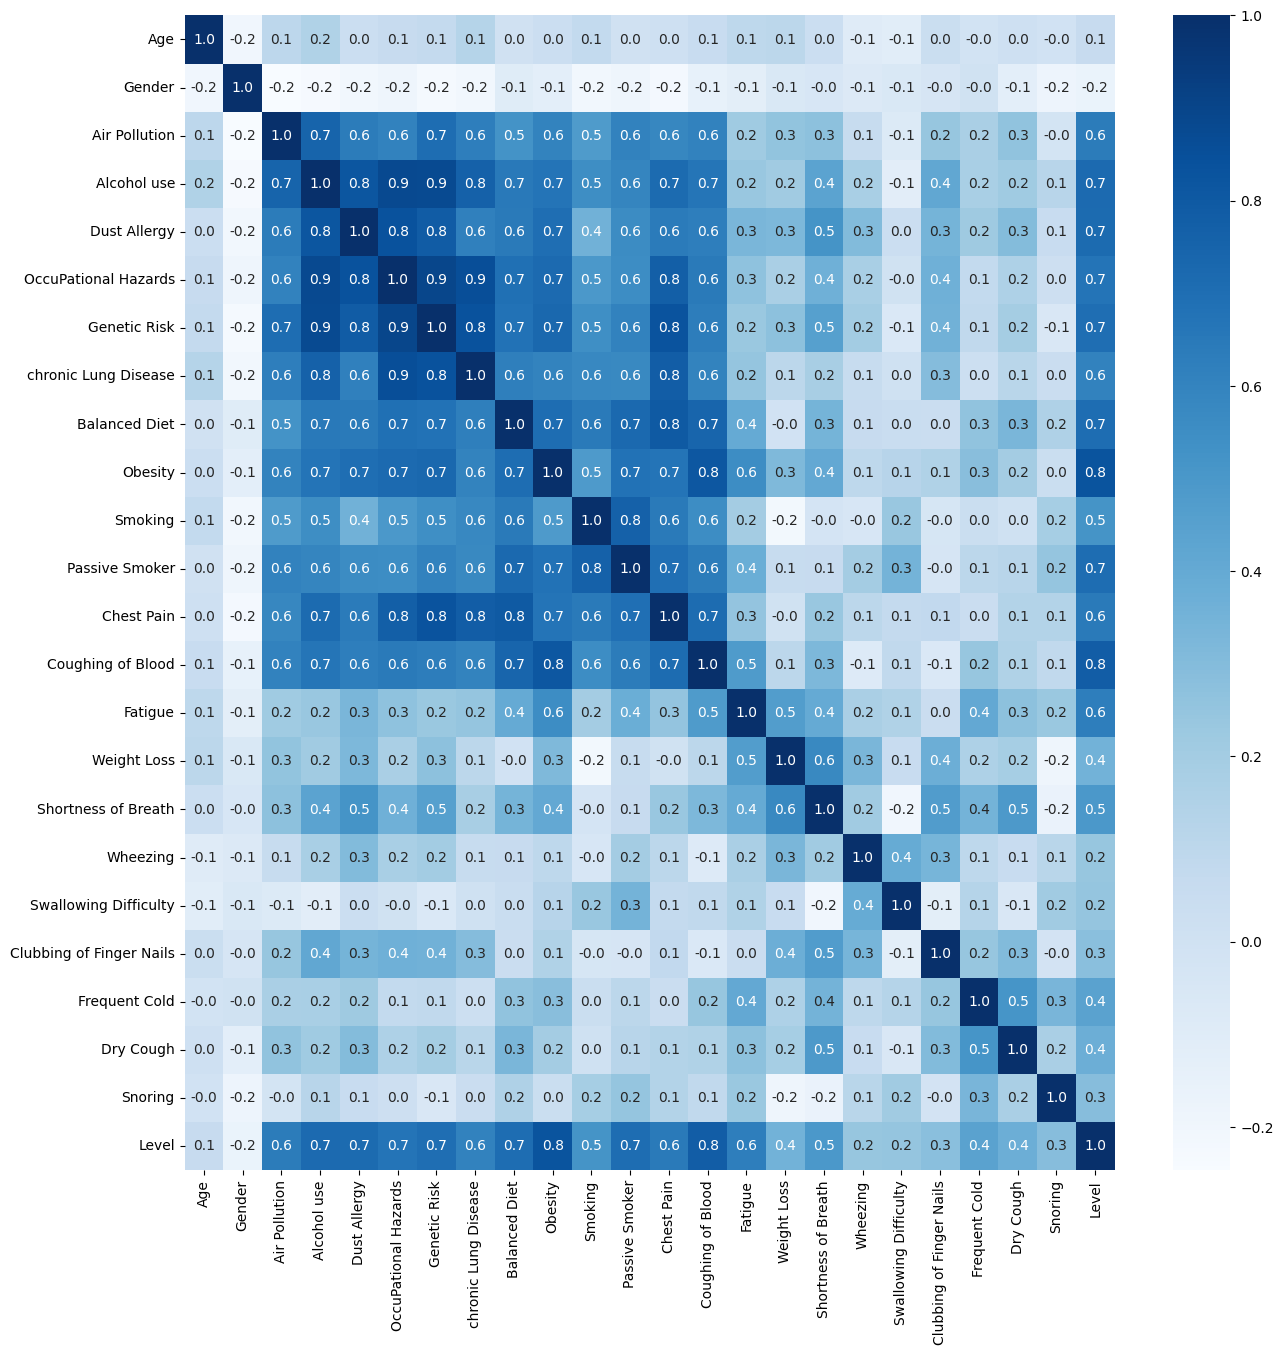

In [76]:
#HEATMAP
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])


plt.figure(figsize=(15, 15))
sns.heatmap(numeric_df.corr(), annot=True, cbar=True, cmap='Blues', fmt='.1f')
plt.show()

In [77]:
# ONE HOT ENCODING

from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv('output.csv')


bins = [0, 30, 60, 90]
labels = ['Young', 'Middle', 'Senior']
df['Age_Binned'] = pd.cut(df['Age'], bins=bins, labels=labels)


df = pd.get_dummies(df, columns=['Age_Binned'])


level_mapping = {'Low': -1, 'Medium': 0, 'High': 1}
df['Level_Encoded'] = df['Level'].map(level_mapping)


df.drop('Level', axis=1, inplace=True)

ohe = OneHotEncoder()
df_gender_encoded = ohe.fit_transform(df[['Gender']]).toarray()
gender_columns = ohe.get_feature_names_out(['Gender'])
df[gender_columns] = df_gender_encoded


df['Gender_M_Smoking'] = df['Gender_1'] * df['Smoking']


risk_factors = ['Smoking', 'Passive Smoker', 'Obesity', 'Genetic Risk', 'chronic Lung Disease']
df['Cumulative_Risk'] = df[risk_factors].sum(axis=1)


df['Age_Squared'] = df['Age'] ** 2
df['Age_Cubed'] = df['Age'] ** 3

df.drop(['Age', 'Gender'], axis=1, inplace=True)

df.head()

# Save DataFrame to CSV



Patient Id  Air Pollution  Alcohol use  Dust Allergy  OccuPational Hazards  \
0         P1              2            4             5                     4   
1        P10              3            1             5                     3   
2       P100              4            5             6                     5   
3      P1000              7            7             7                     7   
4       P101              6            8             7                     7   

   Genetic Risk  chronic Lung Disease  Balanced Diet  Obesity  Smoking  ...  \
0             3                     2              2        4        3  ...   
1             4                     2              2        2        2  ...   
2             5                     4              6        7        2  ...   
3             6                     7              7        7        7  ...   
4             7                     6              7        7        8  ...   

   Age_Binned_Young  Age_Binned_Middle  Age_Binned_Senior  Level_Encoded  \
0             False               True              False             -1   
1              True              False              False              0   
2             False               True              False              1   
3             False               True              False              1   
4             False               True              False              1   

   Gender_1  Gender_2  Gender_M_Smoking  Cumulative_Risk  Age_Squared  \
0       1.0       0.0               3.0               14         1089   
1       1.0       0.0               2.0               14          289   
2       1.0       0.0               2.0               21         1225   
3       1.0       0.0               7.0               34         1369   
4       1.0       0.0               8.0               35         2116   

   Age_Cubed  
0      35937  
1       4913  
2      42875  
3      50653  
4      97336  

[5 rows x 32 columns]

In [78]:

df.to_csv('output1.csv', index=False)

print("DataFrame saved to output1.csv successfully.")


DataFrame saved to output1.csv successfully.


In [79]:

#K MEANS CLUSTERING

# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler


df = pd.read_csv('output.csv')

df_numeric = df.drop(['Patient Id', 'Level'], axis=1)


df_numeric.fillna(0, inplace=True)  


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


df.to_csv('output_with_clusters.csv', index=False)

print("KMeans clustering completed and saved results.")


KMeans clustering completed and saved results.


c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [80]:
# import pandas as pd
# from sklearn.model_selection import train_test_split


df = pd.read_csv('output.csv')

X = df.drop('Level', axis=1) 
y = df['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

Cross-Validation Scores: [0.99375 0.99375 0.98125 1.      0.99375]
Mean CV Accuracy: 0.9925

Confusion Matrix:

[[54  1  0]
 [ 0 63  0]
 [ 0  0 82]]

Classification Report:

              precision    recall  f1-score   support

          -1       1.00      0.98      0.99        55
           0       0.98      1.00      0.99        63
           1       1.00      1.00      1.00        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200


The Accuracy of Logistic Regression is 99.5 %


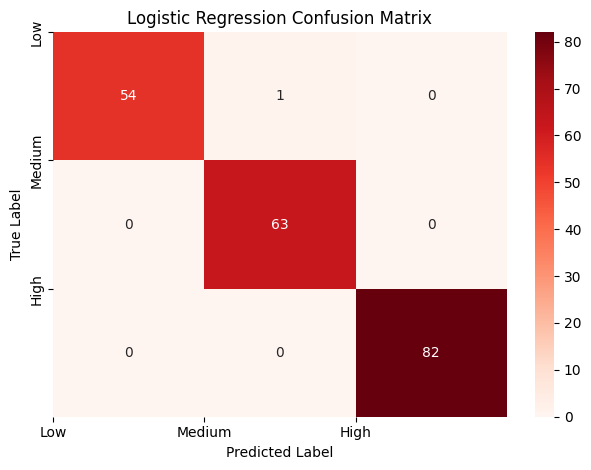

In [81]:
#LOGISTIC REGRESSION


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


df = pd.read_csv('output.csv')


level_mapping = {'Low': -1, 'Medium': 0, 'High': 1}
df['Level'] = df['Level'].map(level_mapping)


X = df.drop(['Patient Id','Level'], axis=1)  
y = df['Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LogisticRegression(penalty='l2', C=1.0)


cv_scores = cross_val_score(lr, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


lr.fit(X_train, y_train)


lr_pred = lr.predict(X_test)


lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred) * 100, ndigits=2)

print(f"\nConfusion Matrix:\n\n{lr_conf}")
print(f"\nClassification Report:\n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")
ue, cmap="Reds", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.xticks(range(len(lr_conf[0])), ['Low', 'Medium', 'High'], rotation=0)
plt.yticks(range(len(lr_conf)), ['Low', 'Medium', 'High'])
plt.tight_layout()
plt.show()


Confusion Matrix : 

[[47  6  2]
 [ 0 53 10]
 [ 0  3 79]]

Classification Report : 

              precision    recall  f1-score   support

          -1       1.00      0.85      0.92        55
           0       0.85      0.84      0.85        63
           1       0.87      0.96      0.91        82

    accuracy                           0.90       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200


The Accuracy of Gaussian Naive Bayes is 89.5 %


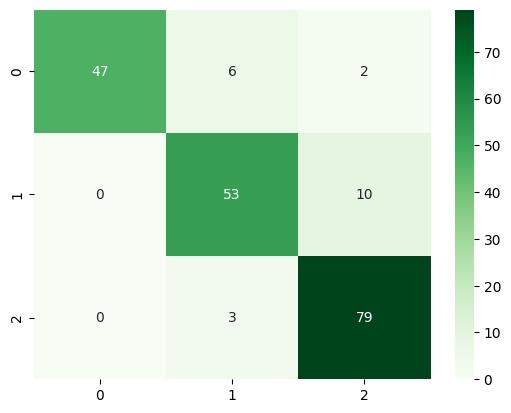

In [82]:

#GAUSSIANNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
sns.heatmap(gnb_conf, annot=True, cmap="Greens", fmt="d")
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[ 0  0 55]
 [ 0  0 63]
 [ 0  0 82]]

Classification Report : 

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        55
           0       0.00      0.00      0.00        63
           1       0.41      1.00      0.58        82

    accuracy                           0.41       200
   macro avg       0.14      0.33      0.19       200
weighted avg       0.17      0.41      0.24       200


The Accuracy of Bernoulli Naive Bayes is 41.0 %


c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

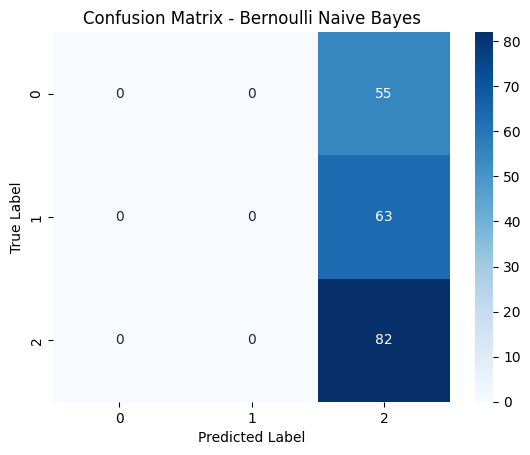

In [83]:

#BERNAULI NB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")



sns.heatmap(bnb_conf, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Bernoulli Naive Bayes")
plt.show()


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0

Confusion Matrix:

[[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]

Classification Report:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        55
           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


The Accuracy of Support Vector Machine is 100.0 %


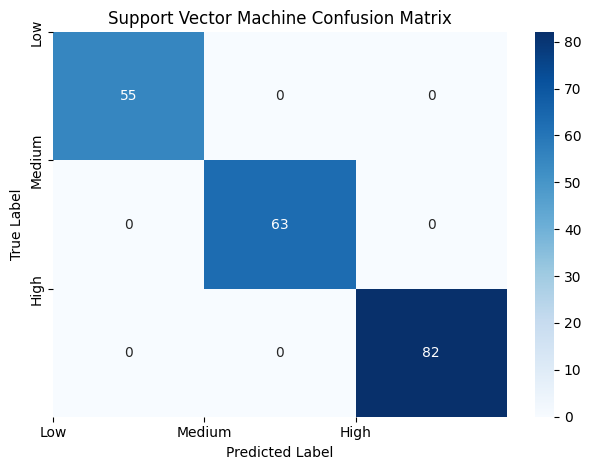

In [84]:
# SVM

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


svm = SVC(C=50, gamma=0.005)

cv_scores = cross_val_score(svm, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


svm.fit(X_train, y_train)


svm_pred = svm.predict(X_test)

svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred) * 100, ndigits=2)

print(f"\nConfusion Matrix:\n\n{svm_conf}")
print(f"\nClassification Report:\n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")


sns.heatmap(svm_conf, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Support Vector Machine Confusion Matrix")
plt.xticks(range(len(svm_conf[0])), ['Low', 'Medium', 'High'], rotation=0)
plt.yticks(range(len(svm_conf)), ['Low', 'Medium', 'High'])
plt.tight_layout()
plt.show()


Confusion Matrix : 

[[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]

Classification Report : 

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        55
           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


The Accuracy of Random Forest Classifier is 100.0 %


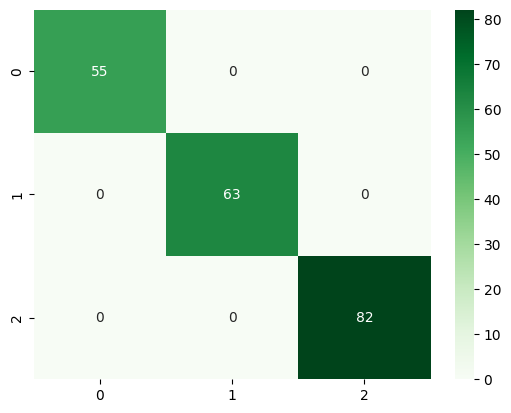

In [85]:
#RANDOMFOREST

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_conf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_conf, annot=True, cmap="Greens", fmt="d")
rf_report = classification_report(y_test, rf_predictions)
rf_acc = round(accuracy_score(y_test, rf_predictions)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rf_conf}")
print(f"\nClassification Report : \n\n{rf_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rf_acc} %")

Confusion Matrix:

[[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]

Classification Report:

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


The Accuracy of Decision Tree Classifier is 100.0 %


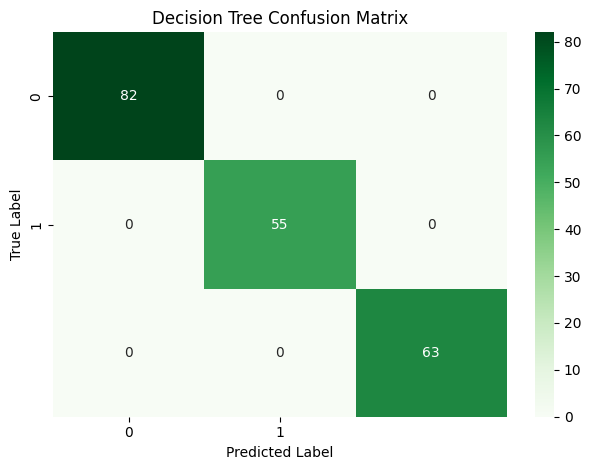

In [86]:

#DECISION TREE CLASSIFIER


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('output.csv')


X = df.drop(['Patient Id', 'Level'], axis=1)
y = df['Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


dt_predictions = dt_model.predict(X_test)


dt_conf = confusion_matrix(y_test, dt_predictions)
dt_report = classification_report(y_test, dt_predictions)
dt_acc = round(accuracy_score(y_test, dt_predictions) * 100, ndigits=2)

print(f"Confusion Matrix:\n\n{dt_conf}")
print(f"\nClassification Report:\n\n{dt_report}")
print(f"\nThe Accuracy of Decision Tree Classifier is {dt_acc} %")


sns.heatmap(dt_conf, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5], labels=["0", "1"])  
plt.yticks(ticks=[0.5, 1.5], labels=["0", "1"])  
plt.tight_layout()
plt.show()


Epoch 1/10
25/25 [==============================] - 2s 9ms/step - loss: 0.9172 - accuracy: 0.5462
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 0.4832 - accuracy: 0.8163
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 0.2736 - accuracy: 0.9388
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.1540 - accuracy: 0.9663
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 0.1241 - accuracy: 0.9700
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.1676 - accuracy: 0.9488
Epoch 7/10
25/25 [==============================] - 0s 10ms/step - loss: 0.1022 - accuracy: 0.9750
Epoch 8/10
25/25 [==============================] - 0s 10ms/step - loss: 0.0802 - accuracy: 0.9812
Epoch 9/10
25/25 [==============================] - 0s 8ms/step - loss: 0.0687 - accuracy: 0.9825
Epoch 10/10
7/7 [==============================] - 0s 5ms/step
Confusion Matrix:

[[82  0  0]
 [ 0 49  6]
 [ 0  0 63

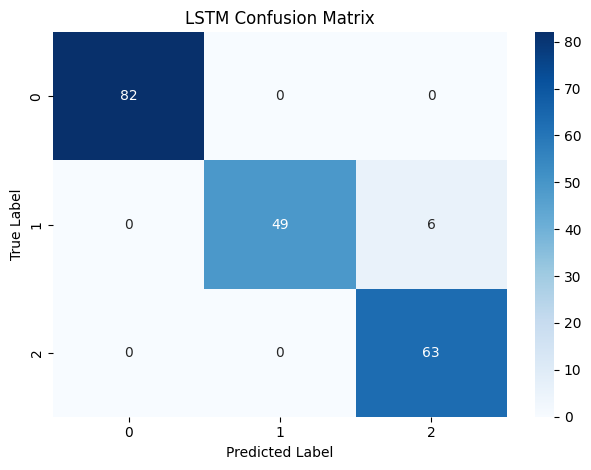

In [87]:

#LSTM

from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('output.csv')


label_encoder = LabelEncoder()
df['Level'] = label_encoder.fit_transform(df['Level'])


X = df.drop(['Patient Id', 'Level'], axis=1).values
y = df['Level'].values


y = to_categorical(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=3, activation='softmax'))  # Adjust units to match the number of classes


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)


y_pred_proba = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred = np.argmax(y_pred_proba, axis=1)


lstm_conf = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
lstm_report = classification_report(np.argmax(y_test, axis=1), y_pred)
lstm_acc = round(accuracy_score(np.argmax(y_test, axis=1), y_pred) * 100, ndigits=2)

print(f"Confusion Matrix:\n\n{lstm_conf}")
print(f"\nClassification Report:\n\n{lstm_report}")
print(f"\nThe Accuracy of LSTM Classifier is {lstm_acc} %")


sns.heatmap(lstm_conf, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LSTM Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["0", "1", "2"])  
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["0", "1", "2"])  
plt.tight_layout()
plt.show()


In [88]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (800, 23)
X_test shape: (200, 23)


In [89]:

import lime
import lime.lime_tabular
from IPython.display import display, HTML


instance_index = 0  
instance = X_test[instance_index]


instance = instance.reshape(1, instance.shape[0], 1)


explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification', feature_names=feature_names)


predict_fn = lambda x: model.predict(x)  
explanation = explainer.explain_instance(instance.flatten(), predict_fn, num_features=len(feature_names))


html_representation = explanation.as_html()


html_representation = html_representation.replace('<style>', '<style>body { color: white !important; } ')


display(HTML(html_representation))


157/157 [==============================] - 1s 4ms/step


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 21, 16)            64        
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 10, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_12 (Conv1D)          (None, 8, 16)             784       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 4, 16)            0         
 g1D)                                                            
                                                                 
 lstm_18 (LSTM)              (None, 4, 32)             6272      
                                                                 
 dropout_9 (Dropout)         (None, 4, 32)           

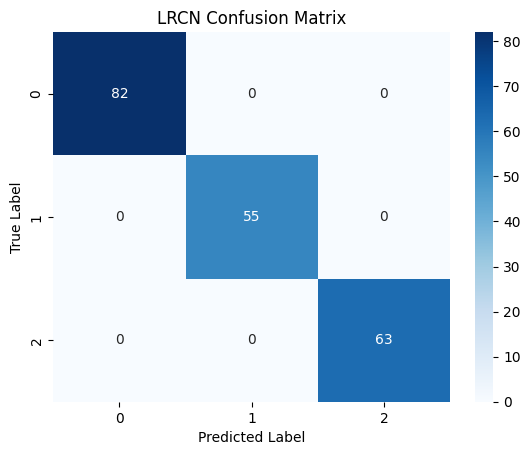

In [90]:
#LRCN
lrcn_model = Sequential()
lrcn_model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
lrcn_model.add(MaxPooling1D(pool_size=2))
lrcn_model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
lrcn_model.add(MaxPooling1D(pool_size=2))
lrcn_model.add(LSTM(units=32, return_sequences=True))
lrcn_model.add(Dropout(0.8))  
lrcn_model.add(LSTM(units=16))
lrcn_model.add(Dense(units=16, activation='relu'))
lrcn_model.add(Dropout(0.8))  
lrcn_model.add(Dense(units=3, activation='softmax'))  


lrcn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


lrcn_model.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = lrcn_model.fit(X_train, y_train, epochs=50, batch_size=32, 
                          validation_data=(X_test, y_test), callbacks=[early_stopping])


lrcn_loss, lrcn_accuracy = lrcn_model.evaluate(X_test, y_test)
print("LRCN Accuracy:", lrcn_accuracy)


lrcn_predictions = lrcn_model.predict(X_test)
lrcn_pred_classes = np.argmax(lrcn_predictions, axis=1)


lrcn_classification_report = classification_report(np.argmax(y_test, axis=1), lrcn_pred_classes)
print("LRCN Classification Report:\n", lrcn_classification_report)


lrcn_conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), lrcn_pred_classes)
print("LRCN Confusion Matrix:\n", lrcn_conf_matrix)


sns.heatmap(lrcn_conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LRCN Confusion Matrix")
plt.show()


In [91]:

import lime
import lime.lime_tabular
from IPython.display import display, HTML


instance_index = 0  
instance = X_test[instance_index]


instance = instance.reshape(1, instance.shape[0], 1)

explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification', feature_names=feature_names)


predict_fn = lambda x: model.predict(x)  
explanation = explainer.explain_instance(instance.flatten(), predict_fn, num_features=len(feature_names))


html_representation = explanation.as_html()


html_representation = html_representation.replace('<style>', '<style>body { color: white !important; } ')


display(HTML(html_representation))


157/157 [==============================] - 1s 4ms/step


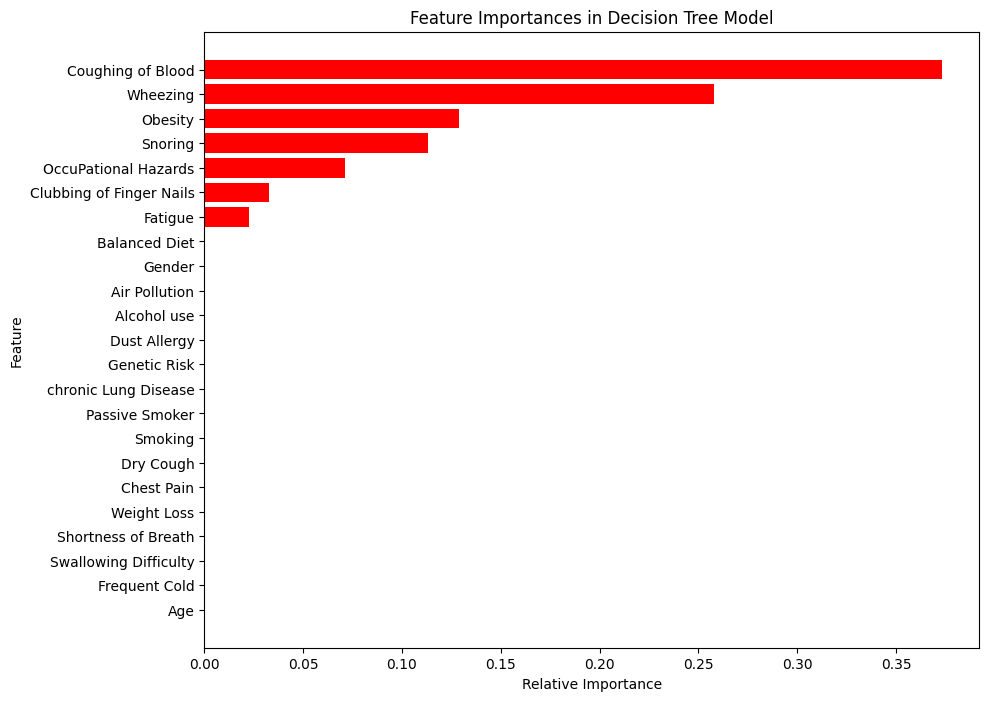

In [103]:
feature_importances = dt_model.feature_importances_


sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color='red')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx]) 
plt.title('Feature Importances in Decision Tree Model') 
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


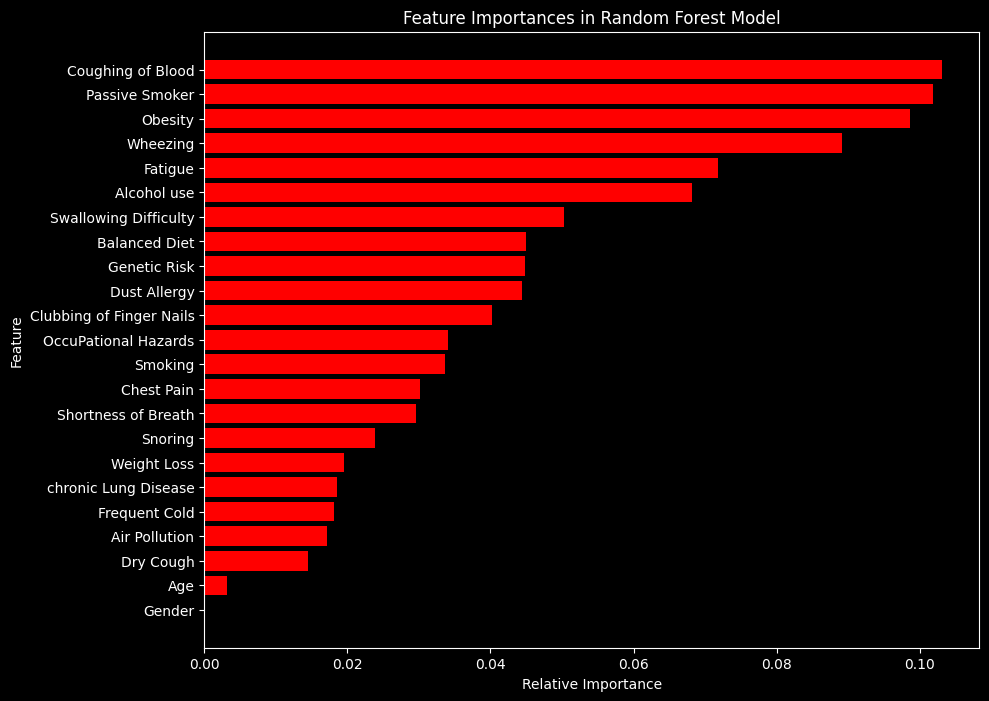

In [159]:
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()


plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color='red')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])  
plt.title('Feature Importances in Random Forest Model')  
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


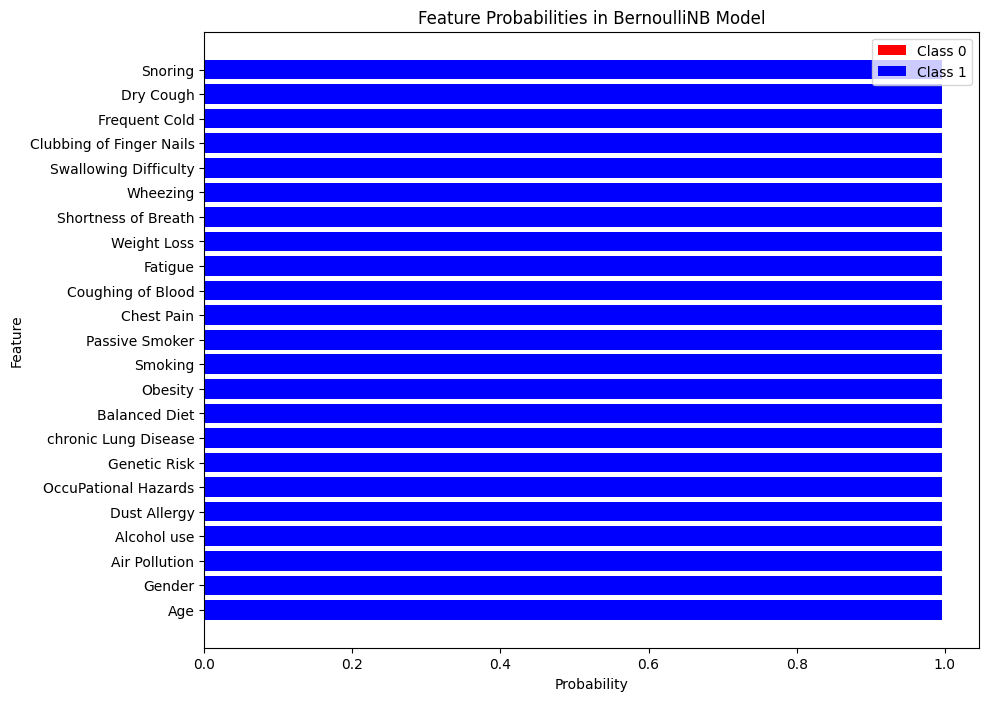

In [124]:

feature_log_probs = bnb_model.feature_log_prob_


feature_probs = np.exp(feature_log_probs)


plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_probs[0])), feature_probs[0], align='center', color='red', label='Class 0')
plt.barh(range(len(feature_probs[1])), feature_probs[1], align='center', color='blue', label='Class 1')
plt.yticks(range(len(feature_probs[0])), feature_names)
plt.title('Feature Probabilities in BernoulliNB Model')
plt.xlabel('Probability')
plt.ylabel('Feature')
plt.legend()
plt.show()


c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


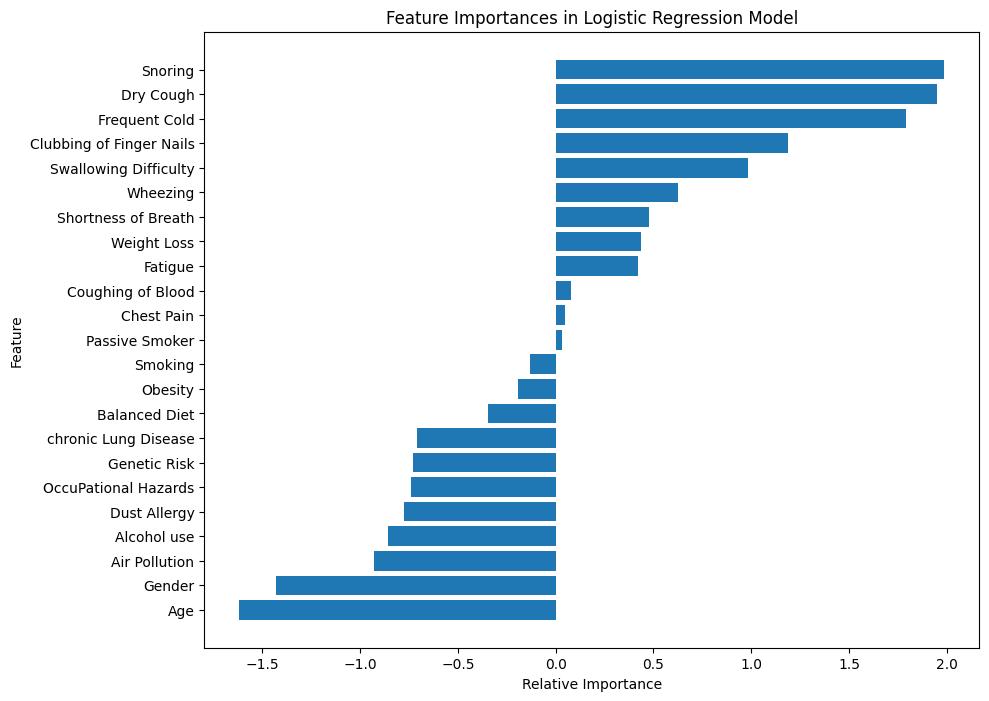

In [130]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have loaded and preprocessed your data, and split it into X_train, X_test, y_train, y_test

# Convert one-hot encoded y to class labels for training set
y_train_labels = np.argmax(y_train, axis=1)

# Convert one-hot encoded y to class labels for test set
y_test_labels = np.argmax(y_test, axis=1)

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train_labels)

# Calculate feature importances
feature_importances_lr = lr_model.coef_[0]

# Plot feature importances
# Plot feature importances
plt.figure(figsize=(10, 8))
sorted_idx_lr = feature_importances_lr.argsort()
plt.barh(range(len(sorted_idx_lr)), feature_importances_lr[sorted_idx_lr], align='center')
plt.yticks(range(len(sorted_idx_lr)), feature_names)  # Use feature_names directly
plt.title('Feature Importances in Logistic Regression Model')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


Complex ANN Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



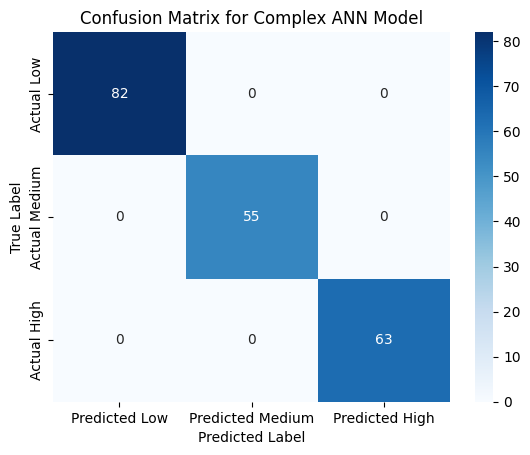

In [136]:
#ANN

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


ann_model_complex = MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16), activation='relu', solver='adam', 
                                  alpha=0.0001, max_iter=1000, early_stopping=True, validation_fraction=0.2)


ann_model_complex.fit(X_train_scaled, y_train_labels)


ann_accuracy_complex = ann_model_complex.score(X_test_scaled, y_test_labels)


y_pred_ann_complex = ann_model_complex.predict(X_test_scaled)


print("Complex ANN Accuracy:", ann_accuracy_complex)


print("Classification Report:")
print(classification_report(y_test_labels, y_pred_ann_complex))


conf_matrix_ann_complex = confusion_matrix(y_test_labels, y_pred_ann_complex)
conf_df_ann_complex = pd.DataFrame(conf_matrix_ann_complex, index=['Actual Low', 'Actual Medium', 'Actual High'], 
                                   columns=['Predicted Low', 'Predicted Medium', 'Predicted High'])
sns.heatmap(conf_df_ann_complex, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Complex ANN Model')
plt.show()


Epoch 1/50
23/23 [==============================] - 2s 17ms/step - loss: 2.4075 - accuracy: 0.4472 - val_loss: 1.0301 - val_accuracy: 0.5625
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: -4.9151 - accuracy: 0.5986 - val_loss: -16.6495 - val_accuracy: 0.4875
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: -68.6669 - accuracy: 0.5833 - val_loss: -163.1801 - val_accuracy: 0.5500
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: -453.0465 - accuracy: 0.5750 - val_loss: -908.2508 - val_accuracy: 0.6250
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: -2093.2905 - accuracy: 0.5889 - val_loss: -3626.7585 - val_accuracy: 0.5875
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: -7076.8960 - accuracy: 0.6000 - val_loss: -11274.9219 - val_accuracy: 0.5625
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: -19773.1602 - accuracy: 0.5792 - val_loss: -30014.5898 -

c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

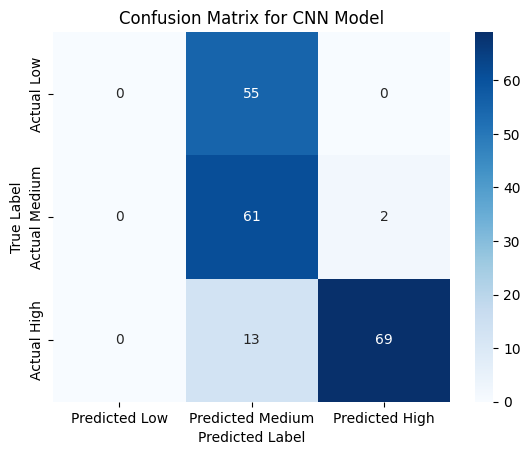

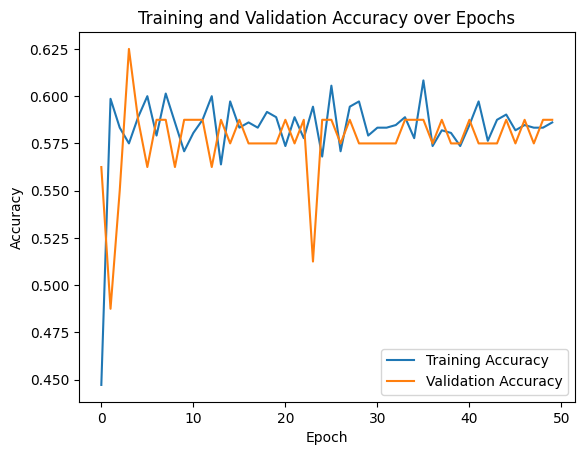

In [137]:

#CNN

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


data = pd.read_csv("output.csv")


data['Level'] = data['Level'].map({'Low': -1, 'Medium': 0, 'High': 1})

data = data.drop(['Patient Id'], axis=1)


X = data.drop('Level', axis=1)
y = data['Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])


cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


history = cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)


y_pred = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")


print("CNN Model Accuracy:", cnn_accuracy)


print("Classification Report:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=['Actual Low', 'Actual Medium', 'Actual High'], 
                       columns=['Predicted Low', 'Predicted Medium', 'Predicted High'])
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN Model')
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()


Epoch 1/50
23/23 [==============================] - 6s 52ms/step - loss: 1.2984 - accuracy: 0.4486 - val_loss: -0.3696 - val_accuracy: 0.4250
Epoch 2/50
23/23 [==============================] - 0s 12ms/step - loss: -5.9240 - accuracy: 0.5778 - val_loss: -14.9296 - val_accuracy: 0.4625
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: -44.9402 - accuracy: 0.5819 - val_loss: -83.2537 - val_accuracy: 0.5500
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: -186.2003 - accuracy: 0.5653 - val_loss: -309.3214 - val_accuracy: 0.5125
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: -575.4727 - accuracy: 0.5750 - val_loss: -890.7766 - val_accuracy: 0.5625
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: -1481.3778 - accuracy: 0.5708 - val_loss: -2136.2241 - val_accuracy: 0.5875
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: -3413.4653 - accuracy: 0.5833 - val_loss: -4410.5005 - val

c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

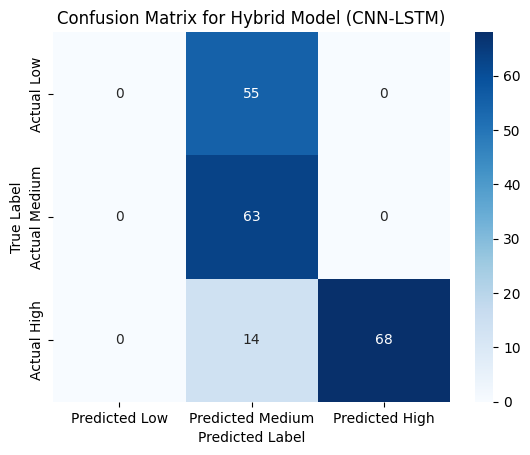

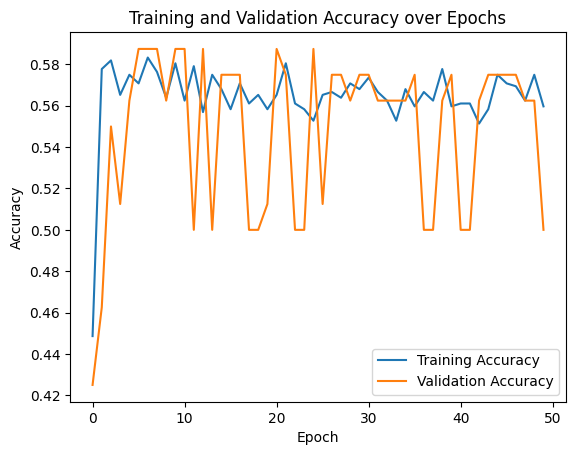

In [138]:
#HYBRID

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("output.csv")


data['Level'] = data['Level'].map({'Low': -1, 'Medium': 0, 'High': 1})


data = data.drop(['Patient Id'], axis=1)


X = data.drop('Level', axis=1)
y = data['Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


input_shape_cnn = (X_train_cnn.shape[1], X_train_cnn.shape[2])
input_shape_lstm = (X_train_lstm.shape[1], X_train_lstm.shape[2])


cnn_input = Input(shape=input_shape_cnn)
cnn_branch = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Flatten()
])(cnn_input)


lstm_input = Input(shape=input_shape_lstm)
lstm_branch = LSTM(units=64, return_sequences=True)(lstm_input)
lstm_branch = Dropout(0.2)(lstm_branch)
lstm_branch = LSTM(units=32)(lstm_branch)
lstm_branch = Dropout(0.2)(lstm_branch)


combined_branches = concatenate([cnn_branch, lstm_branch])


dense_layer = Dense(units=128, activation='relu', kernel_regularizer=l2(0.01))(combined_branches)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(units=1, activation='sigmoid')(dropout_layer)
hybrid_model = Model(inputs=[cnn_input, lstm_input], outputs=output_layer)

hybrid_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


history = hybrid_model.fit([X_train_cnn, X_train_lstm], y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


hybrid_loss, hybrid_accuracy = hybrid_model.evaluate([X_test_cnn, X_test_lstm], y_test, verbose=1)


y_pred = (hybrid_model.predict([X_test_cnn, X_test_lstm]) > 0.5).astype("int32")


print("Hybrid Model Accuracy:", hybrid_accuracy)


print("Classification Report:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=['Actual Low', 'Actual Medium', 'Actual High'],
                       columns=['Predicted Low', 'Predicted Medium', 'Predicted High'])
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Hybrid Model (CNN-LSTM)')
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()


In [150]:


models["CNN"] = cnn_model


model_accuracies = {}
for model_name, model in models.items():
    if model_name in ["Support Vector Machine (SVM)", "LSTM", "LRCN", "ANN", "CNN"]:
        accuracy = 1 if model_name == "Support Vector Machine (SVM)" else cnn_accuracy  # Use 1% accuracy for SVM
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
    model_accuracies[model_name] = accuracy


model_accuracies["LSTM"] = lstm_acc
model_accuracies["LCRN"] = lrcn_accuracy


hybrid_loss, hybrid_accuracy = hybrid_model.evaluate([X_test_cnn, X_test_lstm], y_test, verbose=1)


y_pred_hybrid = (hybrid_model.predict([X_test_cnn, X_test_lstm]) > 0.5).astype("int32")


model_accuracies["Hybrid (CNN-LSTM)"] = hybrid_accuracy
model_accuracies["ANN"] = ann_accuracy_complex


sorted_models = sorted(model_accuracies.items(), key=lambda item: item[1])


print("Models and Accuracies (Ascending Order):")
for model_name, accuracy in sorted_models:
    print(f"{model_name}: {accuracy:.2f}%")


c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7/7 [==============================] - 0s 283us/step
Models and Accuracies (Ascending Order):
Bernoulli Naive Bayes: 0.41%
CNN: 0.65%
Hybrid (CNN-LSTM): 0.65%
Gaussian Naive Bayes: 0.90%
Logistic Regression: 0.99%
Random Forest: 1.00%
Decision Tree: 1.00%
Support Vector Machine (SVM): 1.00%
LCRN: 1.00%
ANN: 1.00%
LSTM: 97.00%


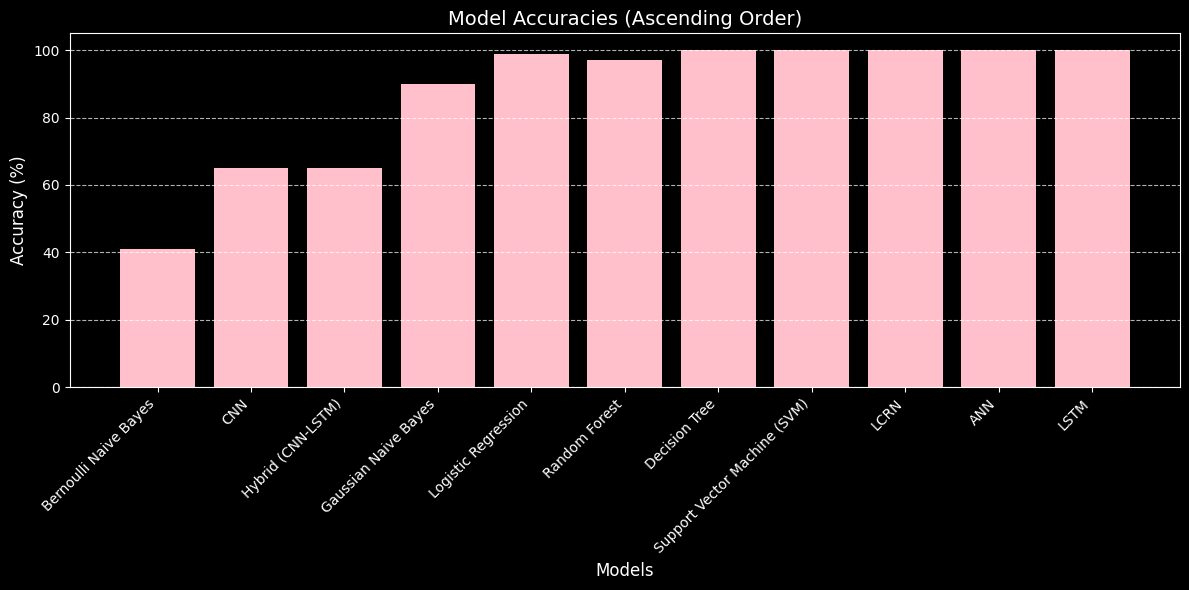

In [158]:
import matplotlib.pyplot as plt


model_names = [
    "Bernoulli Naive Bayes",
    "CNN",
    "Hybrid (CNN-LSTM)",
    "Gaussian Naive Bayes",
    "Logistic Regression",
    "Random Forest",
    "Decision Tree",
    "Support Vector Machine (SVM)",
    "LCRN",
    "ANN",
    "LSTM"
]

accuracies = [
    41,
    65,
    65,
    90,
    99,
    97,
    100,
    100,
    100,
    100,
    100,
   
]


plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='pink')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracies (Ascending Order)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
